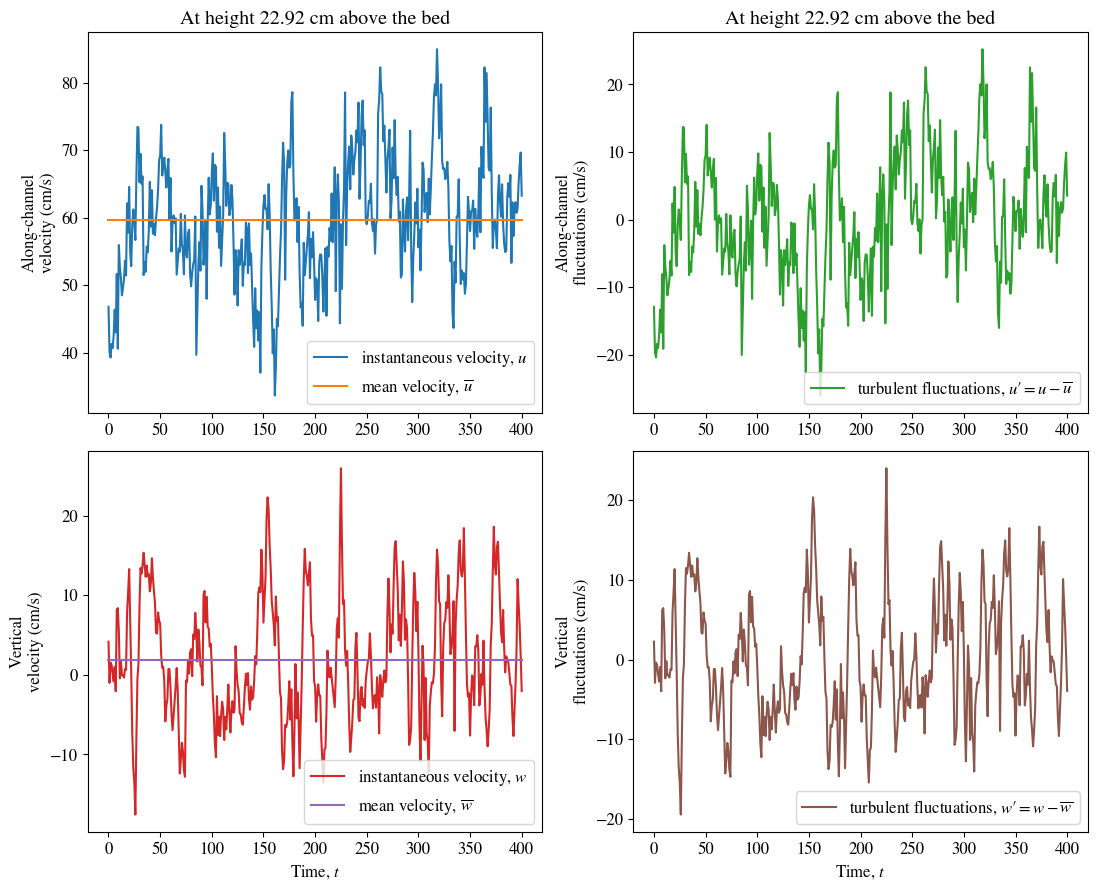

In [1]:
#########################################################
#########################################################
# Lecture 05 - Turbulence
# Created for CEE 474 / CEWA 574, Spring 2021
# By Jacob A. Morgan, Ph.D.
#    University of Washington
#########################################################
#########################################################
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family']=['STIXGeneral',
                             'Times New Roman',
                             'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'stix'
#########################################################
# Read velocity data from .csv files
u = np.genfromtxt('cee474_hw2_u.csv',delimiter=',',skip_header=1) # x-direction velocity (cm/s)
w = np.genfromtxt('cee474_hw2_w.csv',delimiter=',',skip_header=1) # z-direction velocity (cm/s)
z = np.genfromtxt('cee474_hw2_z.csv',delimiter=',',skip_header=1) # z-coordiante (cm)
#########################################################
# Calculate mean velocities over a range
ind = np.arange(0,401) # range of indices
u_bar = np.mean(u[ind,2]) # average downstream velocity (cm/s)
w_bar = np.mean(w[ind,2]) # average vertical velocity (cm/s)
#########################################################
# Calculate turbulent fluctuations over a range
up = u[ind,2]-u_bar # along-channel
wp = w[ind,2]-w_bar # vertical
#########################################################
fig, axs = plt.subplots(2, 2, figsize=(10,8), dpi= 100,
                        facecolor='w', edgecolor='k')
((ax1,ax2),(ax3,ax4)) = axs
#########################################################
# Plot along-channel (x-direction) velocity
axs[0,0].plot(u[ind,2], 'tab:blue', label=r'instantaneous velocity, $u$')
axs[0,0].plot([min(ind),max(ind)],[u_bar,u_bar], 'tab:orange',
              label=r'mean velocity, $\overline{u}$')
plt.setp(axs[0,0], ylabel='Along-channel\nvelocity (cm/s)')
axs[0,0].set_title('At height '+str(np.round(z[2],2))+' cm above the bed')
ax1.legend(loc=4)
#########################################################
# Plot vertical (z-direction) velocity
axs[1,0].plot(w[ind,2], 'tab:red', label=r'instantaneous velocity, $w$')
axs[1,0].plot([min(ind),max(ind)],[w_bar,w_bar], 'tab:purple',
              label=r'mean velocity, $\overline{w}$')
plt.setp(axs[1,0], ylabel='Vertical\nvelocity (cm/s)',
        xlabel='Time, $t$')
ax3.legend(loc=4)
#########################################################
# Plot along-channel turbulent fluctuation
axs[0,1].plot(up, 'tab:green',
              label=r'turbulent fluctuations, $u\prime=u-\overline{u}$')
plt.setp(axs[0,1], ylabel='Along-channel\nfluctuations (cm/s)')
axs[0,1].set_title('At height '+str(np.round(z[2],2))+' cm above the bed')
ax2.legend(loc=4)
#########################################################
# Plot vertical turbulent fluctuation
axs[1,1].plot(wp, 'tab:brown',
              label=r'turbulent fluctuations, $w\prime=w-\overline{w}$')
plt.setp(axs[1,1], ylabel='Vertical\nfluctuations (cm/s)',
        xlabel='Time, $t$')
ax4.legend(loc=4)
#########################################################
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.1,
                    wspace=0.2)
plt.show()

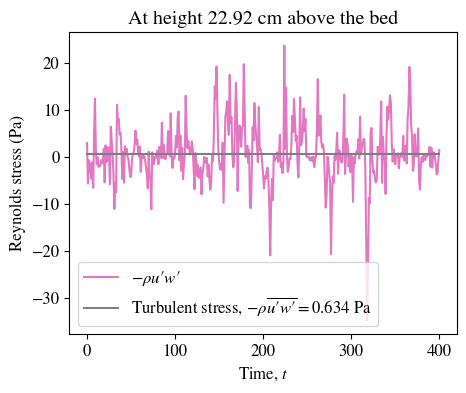

In [2]:
# Plot Reynolds (turbulent) stress
rho = 1000 # water density (kg/m^3)
fig, ax = plt.subplots(figsize=(5,4), dpi= 100,
                        facecolor='w', edgecolor='k')
ax.plot(-rho*up/100*wp/100, 'tab:pink', label=r'$-\rho u\prime w\prime$')
ax.plot([min(ind), max(ind)], [-rho*np.mean(up/100*wp/100), -rho*np.mean(up/100*wp/100)], 'tab:gray',
        label=r'Turbulent stress, $-\rho\overline{u\prime w\prime}='+str(np.round(-rho*np.mean(up/100*wp/100),3))+r'$ Pa')
plt.xlabel('Time, $t$')
plt.ylabel('Reynolds stress (Pa)')
plt.title('At height '+str(np.round(z[2],2))+' cm above the bed')
plt.legend()
plt.show()